In [83]:
import matplotlib.pyplot as plt

In [8]:
from data_provider import DataModel
dm = DataModel()
dm.restore_from_pystore()

In [52]:
df = dm.get("خساپا")

In [53]:
df.columns

Index(['symbol', 'name', 'amount', 'volume', 'value', 'lastday', 'open',
       'close', 'last-change', 'last-percent', 'ending', 'ending-change',
       'ending-percent', 'min', 'max', 'year', 'month', 'day', 'diff_min_max',
       'diff_open', 'adj_min', 'adj_max', 'adj_close', 'adj_open',
       'adj_ending', 'log_adj_open', 'log_adj_close', 'log_adj_ending',
       'log_adj_min', 'log_adj_max', 'adj_scale'],
      dtype='object')

In [55]:
len(df)

684

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
x = range(1, len(df2)+1)

In [49]:
df2 = pd.DataFrame([[1,  2], [3,  9],  [2, 6],  [7, 8],  [9, 9]] )

a = df2[1].rolling(10).sum()
a

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 1, dtype: float64

In [99]:

df["mins"] = df["adj_close"].rolling(10).min().shift(-5)

In [100]:
len(df[df.adj_close == df.mins])

45

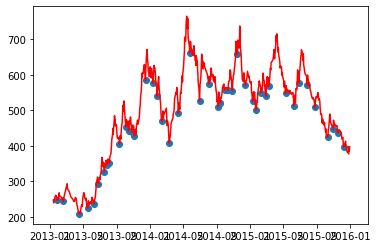

In [102]:
plt.scatter(df[df.adj_close == df.mins].index, df[df.adj_close == df.mins]["adj_close"])
plt.plot(df.index,df.adj_close,c='r')

In [95]:
len(df[df["close"] == df["mins"]])

45

In [71]:
df["close"].rolling(3).min().head()

date
2013-01-13      NaN
2013-01-14      NaN
2013-01-15    909.0
2013-01-16    909.0
2013-01-19    919.0
Name: close, dtype: float64

In [40]:
from sklearn.linear_model import LinearRegression
xx  = np.array(range(1, len(df2)+1))
x = xx.reshape(-1, 1)
y = df2["log_adj_close"].values


In [45]:
model = LinearRegression()
model.fit(x,  y)
a = model.coef_
b = model.intercept_

In [47]:
std = np.std(df2["log_adj_close"])

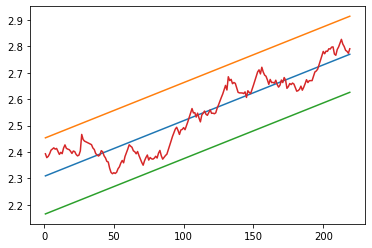

In [48]:
plt.plot(xx, a*xx+b)
plt.plot(xx, a*xx+b+std)
plt.plot(xx, a*xx+b-std)
plt.plot(xx, df2["log_adj_close"])
plt.show()

In [ ]:
df2.plot()

In [ ]:
df["adj_close"].plot()

In [ ]:
df3 = td.add_adjust(df2)

In [ ]:
df = dm.get("خساپا")
df.index

In [125]:
find_supports("1391","1392")

FileNotFoundError: File b'../xcels/master0.csv' does not exist

In [124]:
# %%writefile ta_module.py


import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
from math import pi
import math
# import trade_model as td
import matplotlib.pyplot as plt
from data_provider import DataModel


accepted_error = 0.0

def find_supports(firstdate, lastdate, stockname = "خساپا", minimum_touch = 3):
   
    dm = DataModel()
    dm.read_from_csvs("../xcels",["master0.csv","master1.csv"])
    df = dm.get("خساپا", firstdate, lastdate)
    stocko = df["log_adj_open"].tolist()
    stockc = df["log_adj_close"].tolist()
    dates = df.index # for converting startm s to real date .... startm and stopm s are some indexes of stoko array
    
    lows = []
    lows_price = []
    for j in range(len(stocko)): 
        minimum = min(stocko[j], stockc[j])
        if ( (j > 10) and (j+10  <  len(stocko)) ):
            if (minimum   <= min(stocko[j-10:j+10]) and minimum   <= min(stockc[j-10:j+10])):
                lows.append(j)
                lows_price.append(minimum)

        #finding the best lines 
    # cnt = numbers of line segments
    cnt = 0
    # start and stop[cnt] = start poit in x axes and stop point for each line segments
    startm = []
    stopm = []
    checkedpoint = []
    lastpoint = 0
    count_max = 0
    a_maxm = []
    b_maxm = []
    xarr = lows
    yarr = lows_price
    max_last = 0
    # all tangents from 80 to-80 digree . i will break them in to 1000 pieces
    digree = np.linspace(-80, 80, 1000)
    digrees = np.tan(digree * pi / 180)


    for point in range(len(xarr)) :
        max_last = 0  
        count_max = 0
    #  x and y are the ones of this point
        x = xarr[point]
        y = yarr[point]
    # for this point i am breaking the line into 100 pieces
        b_fakes = np.linspace(y-15, y+15, 100)  
        for b in b_fakes:
            for a in digrees:
                count = 0
                for p in range(point+1, len(xarr)):
                #  x_ and y_ s are for all next points in new dimensions !!
                    x_ = xarr[p]-x
                    y_ = yarr[p], 
                    if((x_ * a+b >= y_-15) and (x_ * a+b   <= y_+15)):
                        count+= 1
                        lastpoint = xarr[p]
                    elif (y_+10 < x_*a+b ):
                        break
                if(count > count_max):
                    max_last = lastpoint # max last baraye save kardane lastpointi ke niaz darime . maxof_a ,   b ham hamintor
                    count_max = count
                    maxof_a = a
                    maxof_b = b
                lastpoint = 0

    #   if this start point include a line that touch three points: count_max are the number of other points ( = 2) . so it should be >= minimum touch - 1
        if(count_max >= minimum_touch-1):
            repetitious = False
            a_in_radian = math.atan(maxof_a)
            a_in_degree = math.degrees(a_in_radian)
            for cnt in range(len(a_maxm)):
                if((math.degrees(math.atan(a_maxm[cnt])) >= a_in_degree-5) and 
                   (math.degrees(math.atan(a_maxm[cnt])) <= a_in_degree+5) and
                   (stopm[cnt] == max_last)):
                    repetitious = True

            if(not(repetitious)):
                a_maxm.append(maxof_a)
                b_maxm.append(maxof_a*(-x)+maxof_b)
                startm.append(x)
                stopm.append(max_last)
    
#     dates[startm]  because we wanna return exact date
    return dates[startm], dates[stopm], a_maxm, b_maxm, df


def find_resistances(firstdate, lastdate, stockname = "خساپا", minimum_touch = 3):
    dm = td.DataModel("../xcels", ["master0.csv", "master1.csv"])
    dm.read()
    df = dm.get(stockname, firstdate, lastdate)
   
    stocko = df["open"].tolist()
    stockc = df["close"].tolist()
    dates = df.index # for converting startm s to real date .... startm and stopm s are some indexes of stoko array
    

    highs = []
    highs_price = []
    for j in range(len(stocko)): 
        maximum = max(stocko[j], stockc[j])
        if ( (j > 10) and (j+10 < len(stocko)) ):
            if (maximum >= max(stocko[j-10:j+10]) and maximum >= max(stockc[j-10:j+10])):
                highs.append(j)
                highs_price.append(maximum)

    #finding the best lines 
    # cnt= numbers of line segments
    cnt = 0
    # start and stop[cnt]= start poit in x axes and stop point for each line segments
    start = []
    stop = []
    checkedpoint = []
    lastpoint = 0
    count_max = 0
    a_max= []
    b_maxv = []
    xarr = highs
    yarr = highs_price
    max_last = 0
    # all tangents from 80 to-80 digree . i will break them in to 1000 pieces
    digree = np.linspace(-80, 80, 1000)
    digrees = np.tan(digree*pi / 180)


    for point in range(len(xarr)) :
        max_last = 0
        count_max = 0
    #  x and y are the ones of this point
        x = xarr[point]
        y = yarr[point]
    # for this point i am breaking the line into 100 pieces
        b_fakes = np.linspace(y-15, y+15, 100)  
        for b in b_fakes:
            for a in digrees:
                count = 0
                for p in range(point+1, len(xarr)):
                #  x_ and y_ s are for all next points in new dimensions !!
                    x_ = xarr[p]-x
                    y_ = yarr[p]
                    if((x_*a+b >= y_-15) and (x_*a+b <= y_+15)):
                        count += 1
                        lastpoint = xarr[p]
                    elif (y_-10 > x_*a+b ):
                        break
                if(count > count_max):
                    max_last = lastpoint # max last baraye save kardane lastpointi ke niaz darime . maxof_a ,  b ham hamintor
                    count_max = count
                    maxof_a = a
                    maxof_b = b
                lastpoint = 0

    #   if this start point include a line that touch three points: count_max are the number of other points .
        if(count_max >= minimum_touch-1):
            repetitious = False
            a_in_radian = math.atan(maxof_a)
            a_in_degree = math.degrees(a_in_radian)
            for cnt in range(len(a_max)):
                if((math.degrees(math.atan(a_max[cnt])) >= a_in_degree-5) and 
                   (math.degrees(math.atan(a_max[cnt])) <= a_in_degree +5) and
                   (stop[cnt] == max_last)):
                    repetitious = True

            if(not(repetitious)):
                a_max.append(maxof_a)
                b_max.append(maxof_a*(-x)+maxof_b)
                start.append(x)
                stop.append(max_last)
    #     dates[startm]  because we wanna return exact date
    return dates[start], dates[stop], a_max, b_max, df

In [ ]:
startm, stopm, a, b, df = find_supports("1392-01-01", "1398-06-20", "خساپا")

In [ ]:
start, stop, aa, bb, _ = find_resistances("1392-01-01", "1398-06-20", "خساپا")

In [ ]:
df.iloc[startm[0]]


In [ ]:
st

In [ ]:
print(df.loc[startm[0]])


In [ ]:
plt.figure(figsize = (16, 8), dpi = 150)
df["close"].plot()


In [ ]:
df